In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from umap import UMAP
import sys
sys.path.append('..')
from utils import load_pickle, save_pickle, seed_everything
seed_everything(42)

/home/sagawa/miniconda3/envs/reactiont5/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
target_embedding = np.load("/mnt/d/ReactionT5_neword_241116/task_forward/output_ord/embedding_mean_v5.npy")
print(target_embedding.shape)

(1787900, 768)


In [6]:
# sample 10000 points
sample_idx_target = np.random.choice(target_embedding.shape[0], 10000, replace=False)
target_embedding = target_embedding[sample_idx_target]

In [7]:
# apply UMAP and plot
# umap = UMAP(n_components=2)
# target_embedding_umap = umap.fit_transform(target_embedding)

# save_pickle("/data1/ReactionT5_neword/task_forward/output_ord/umap_v5.pkl", umap)
# np.save("/data1/ReactionT5_neword/task_forward/output_ord/embedding_umap_v5.npy", target_embedding_umap)
target_embedding_umap = np.load("/mnt/d/ReactionT5_neword_241116/task_forward/output_ord/embedding_umap_v5.npy")
print(target_embedding_umap.shape)

(10000, 2)


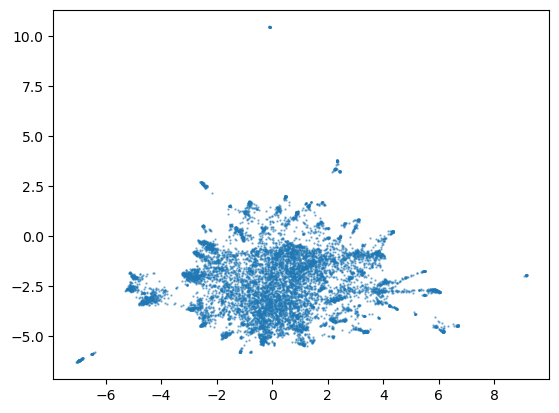

In [8]:
fig, ax = plt.subplots()
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=0.5)

In [9]:
query_embedding = np.load("/mnt/d/ReactionT5_neword_241116/task_forward/output_uspto_test/embedding_mean_v5.npy")
print(query_embedding.shape)

(40000, 768)


In [10]:
sample_idx_query = np.random.choice(query_embedding.shape[0], 10000, replace=False)
# query_embedding = query_embedding[sample_idx_query]
# query_embedding_umap = umap.transform(query_embedding)
# np.save("/data1/ReactionT5_neword/task_forward/output_uspto_test/query_embedding_umap_v5.npy", query_embedding_umap)
query_embedding_umap = np.load("/mnt/d/ReactionT5_neword_241116/task_forward/output_uspto_test/query_embedding_umap_v5.npy")
print(query_embedding_umap.shape)

(10000, 2)


/tmp/ipykernel_9114/1800293269.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_9114/1800293269.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


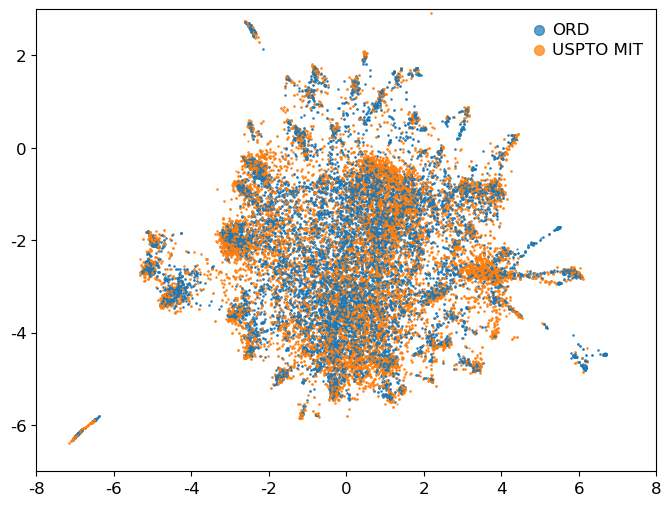

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in range(0, 10000, 200):
    ax.scatter(target_embedding_umap[i:i+500, 0], target_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="ORD" if i == 0 else None, color="#1f77b4")
    ax.scatter(query_embedding_umap[i:i+500, 0], query_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="USPTO MIT" if i == 0 else None, color="#ff7f0e")
# ax.set_xlabel("UMAP 1")
# ax.set_ylabel("UMAP 2")
ax.set_xlim(-8, 8)
ax.set_ylim(-7, 3)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)


In [12]:
df_target = pd.read_csv("/mnt/d/ReactionT5_neword_241116/task_forward/output_ord/input_data_v5.csv")
df_target = df_target.iloc[sample_idx_target].reset_index(drop=True)
df_query = pd.read_csv("/mnt/d/ReactionT5_neword_241116/task_forward/output_uspto_test/input_data_v5.csv")
df_query = df_query.iloc[sample_idx_query].reset_index(drop=True)

df_target["input"] = df_target["input"].apply(lambda x: x.replace("REACTANT:", "").replace("REAGENT:", ".").replace(". ", ""))
df_query["input"] = df_query["input"].apply(lambda x: x.replace("REACTANT:", "").replace("REAGENT:", ".").replace(". ", ""))

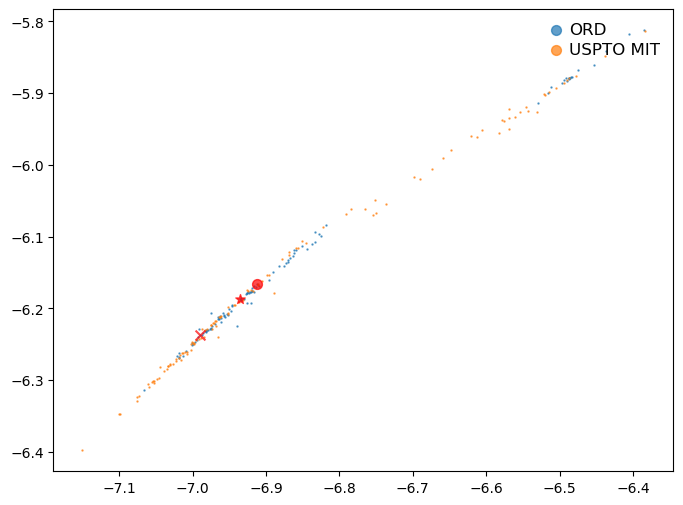

In [13]:
target_embedding_umap[:, 0] < -6
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
selected_target_embedding_umap = target_embedding_umap[target_embedding_umap[:, 0] < -6]
selected_df_target = df_target[target_embedding_umap[:, 0] < -6]
selected_query_embedding_umap = query_embedding_umap[query_embedding_umap[:, 0] < -6]
selected_df_query = df_query[query_embedding_umap[:, 0] < -6]
for i in range(0, 10000, 200):
    ax.scatter(selected_target_embedding_umap[i:i+500, 0], selected_target_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="ORD" if i == 0 else None, color="#1f77b4")
    ax.scatter(selected_query_embedding_umap[i:i+500, 0], selected_query_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="USPTO MIT" if i == 0 else None, color="#ff7f0e")
ax.scatter(selected_target_embedding_umap[10, 0], selected_target_embedding_umap[10, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="x")
ax.scatter(selected_target_embedding_umap[50, 0], selected_target_embedding_umap[50, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="*")
ax.scatter(selected_target_embedding_umap[80, 0], selected_target_embedding_umap[80, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="o")
# ax.set_xlabel("UMAP 1")
# ax.set_ylabel("UMAP 2")
# ax.set_xlim(-8, 8)
# ax.set_ylim(-7, 3)
# ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
# ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)


10 REACTANT


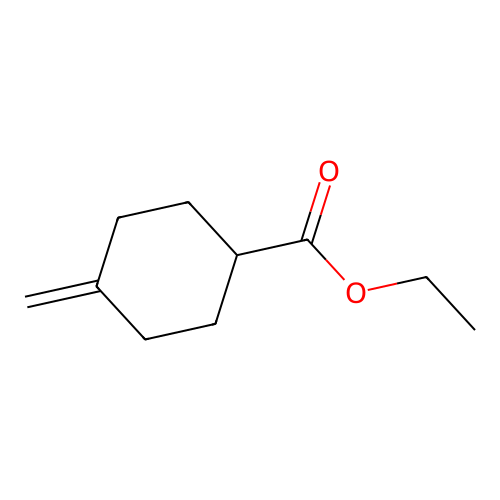

10 REAGENT
No compound
10 PRODUCT


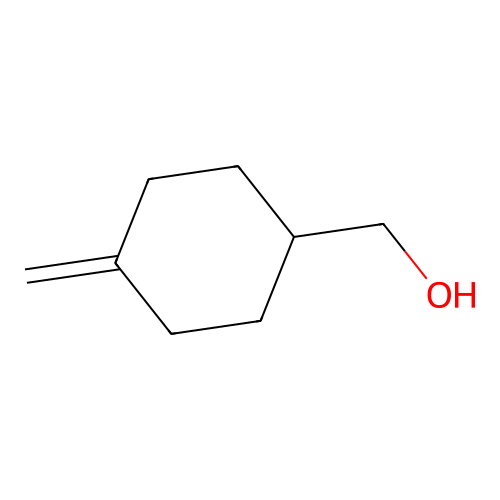

50 REACTANT


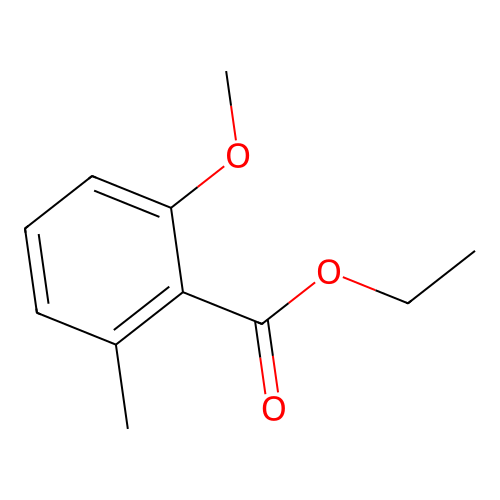

50 REAGENT


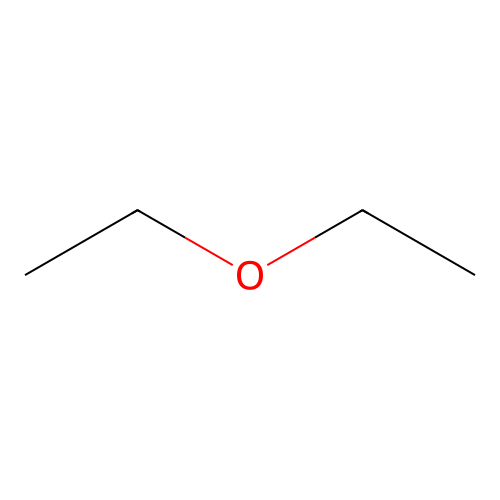

50 PRODUCT


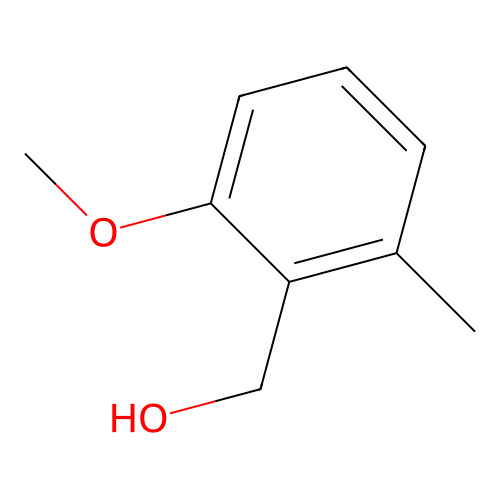

80 REACTANT


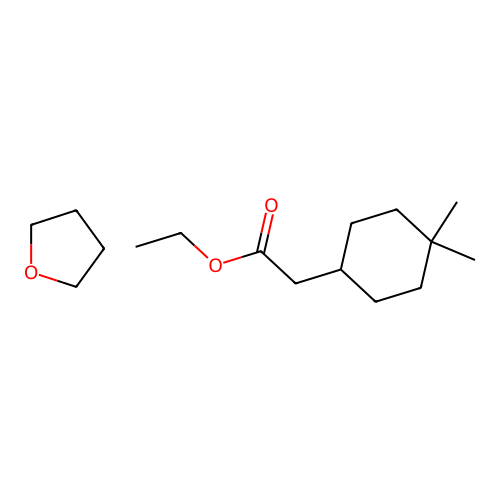

80 REAGENT
No compound
80 PRODUCT


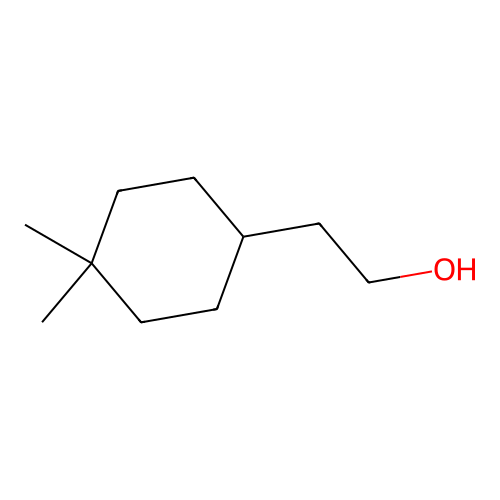

In [14]:
for idx in [10, 50, 80]:
    for col in ["REACTANT", "REAGENT", "PRODUCT"]:
        print(idx, col)
        # visualize the compounds with RDKit
        from rdkit import Chem
        from rdkit.Chem import Draw
        smiles = selected_df_target.iloc[idx][col]
        if smiles != " ":
            smiles = [i for i in smiles.split(".") if ("C" in i or "c" in i) and i != "Cl" ]
            smiles = ".".join(smiles)
            mol = Chem.MolFromSmiles(smiles)
            img = Draw.MolToImage(mol, size=(500, 500), fitImage=True)
            display(img)
        else:
            print("No compound")
    

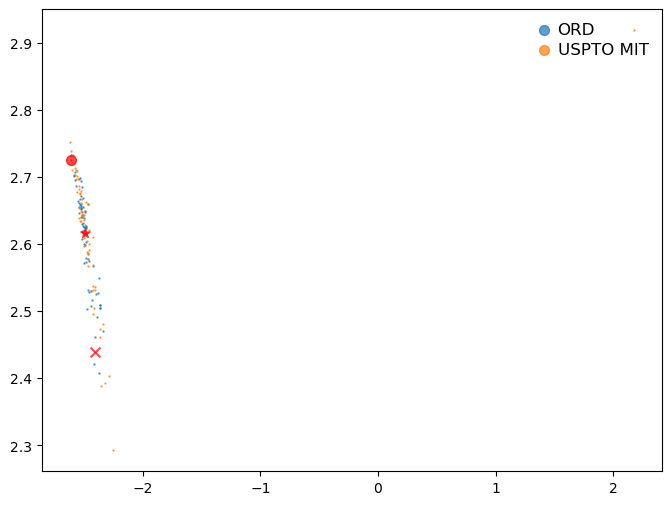

In [15]:
target_embedding_umap[:, 0] < -6
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
selected_target_embedding_umap = target_embedding_umap[(target_embedding_umap[:, 1] > 2.2) & (target_embedding_umap[:, 1] < 3)]
selected_df_target = df_target[(target_embedding_umap[:, 1] > 2.2) & (target_embedding_umap[:, 1] < 3)]
selected_query_embedding_umap = query_embedding_umap[(query_embedding_umap[:, 1] > 2.2) & (query_embedding_umap[:, 1] < 3)]
selected_df_query = df_query[(query_embedding_umap[:, 1] > 2.2) & (query_embedding_umap[:, 1] < 3)]
for i in range(0, 10000, 200):
    ax.scatter(selected_target_embedding_umap[i:i+500, 0], selected_target_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="ORD" if i == 0 else None, color="#1f77b4")
    ax.scatter(selected_query_embedding_umap[i:i+500, 0], selected_query_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="USPTO MIT" if i == 0 else None, color="#ff7f0e")
ax.scatter(selected_target_embedding_umap[10, 0], selected_target_embedding_umap[10, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="x")
ax.scatter(selected_target_embedding_umap[30, 0], selected_target_embedding_umap[30, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="*")
ax.scatter(selected_target_embedding_umap[50, 0], selected_target_embedding_umap[50, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="o")
# ax.set_xlabel("UMAP 1")
# ax.set_ylabel("UMAP 2")
# ax.set_xlim(-8, 8)
# ax.set_ylim(-7, 3)
# ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
# ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)


12 REACTANT


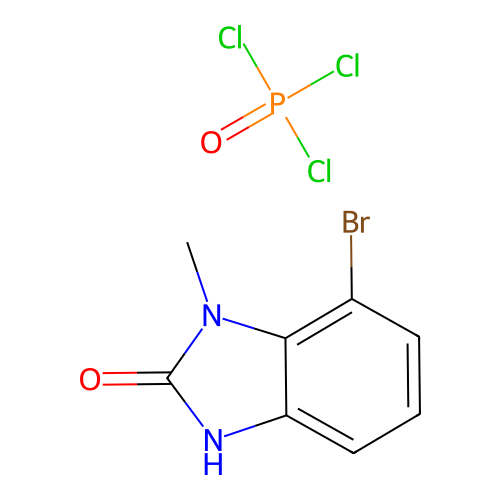

12 REAGENT
No compound
12 PRODUCT


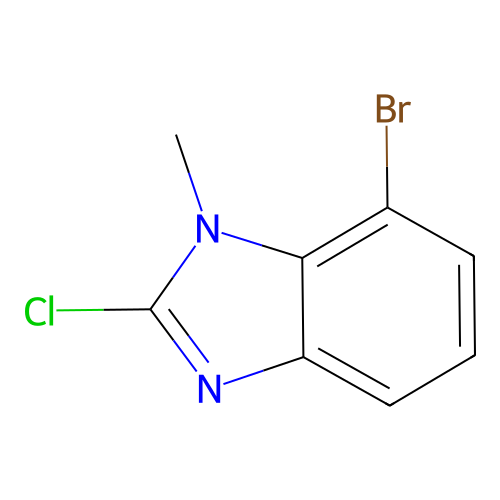

30 REACTANT


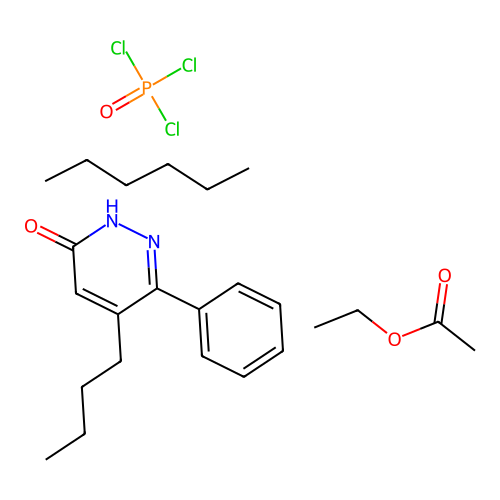

30 REAGENT
No compound
30 PRODUCT


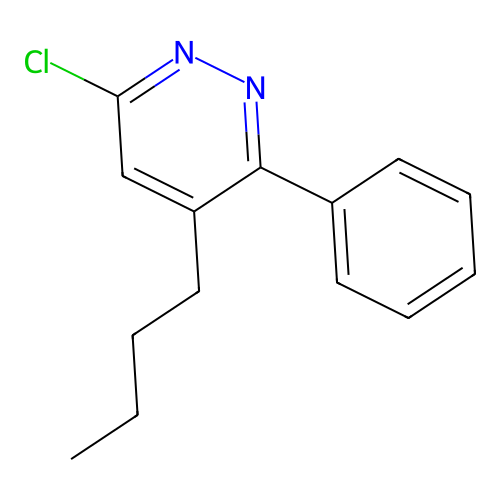

50 REACTANT


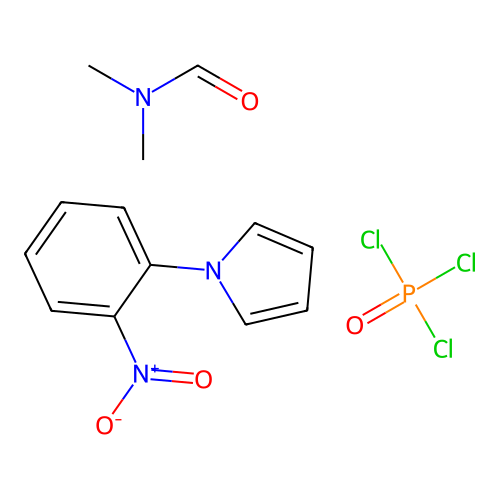

50 REAGENT
No compound
50 PRODUCT


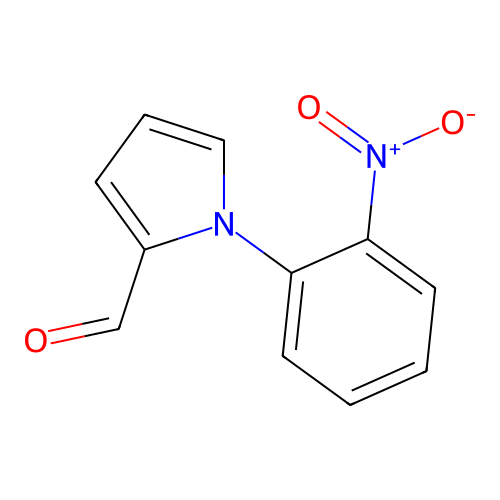

In [17]:
for idx in [12, 30, 50]:
    for col in ["REACTANT", "REAGENT", "PRODUCT"]:
        print(idx, col)
        # visualize the compounds with RDKit
        from rdkit import Chem
        from rdkit.Chem import Draw
        smiles = selected_df_target.iloc[idx][col]
        if smiles != " ":
            smiles = [i for i in smiles.split(".") if ("C" in i or "c" in i) and i != "Cl" ]
            smiles = ".".join(smiles)
            mol = Chem.MolFromSmiles(smiles)
            img = Draw.MolToImage(mol, size=(500, 500), fitImage=True)
            display(img)
        else:
            print("No compound")
    

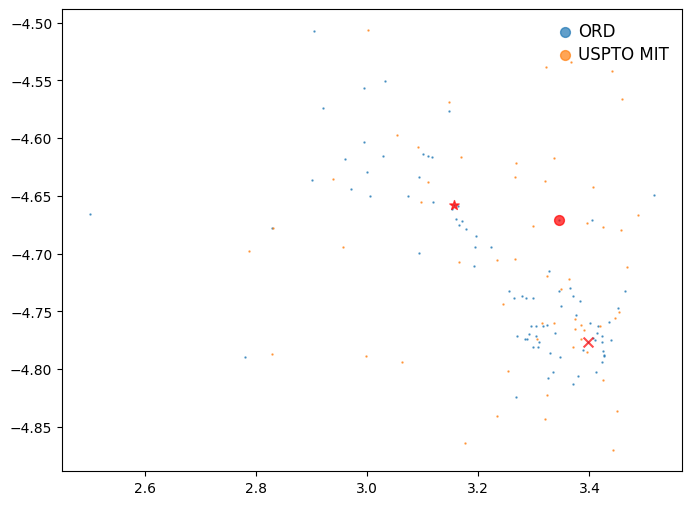

In [79]:
target_embedding_umap[:, 0] < -6
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
selected_target_embedding_umap = target_embedding_umap[(target_embedding_umap[:, 1] > -6) & (target_embedding_umap[:, 1] <-4.5) & (target_embedding_umap[:, 0] < 4)  & (target_embedding_umap[:, 0] > 2.5)]
selected_df_target = df_target[(target_embedding_umap[:, 1] > -6) & (target_embedding_umap[:, 1] <-4.5) & (target_embedding_umap[:, 0] < 4)  & (target_embedding_umap[:, 0] > 2.5)]
selected_query_embedding_umap = query_embedding_umap[(query_embedding_umap[:, 1] > -6) & (query_embedding_umap[:, 1] <-4.5) & (query_embedding_umap[:, 0] < 4)  & (query_embedding_umap[:, 0] > 2.5)]
selected_df_query = df_query[(query_embedding_umap[:, 1] > -6) & (query_embedding_umap[:, 1] <-4.5) & (query_embedding_umap[:, 0] < 4)  & (query_embedding_umap[:, 0] > 2.5)]
for i in range(0, 10000, 200):
    ax.scatter(selected_target_embedding_umap[i:i+500, 0], selected_target_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="ORD" if i == 0 else None, color="#1f77b4")
    ax.scatter(selected_query_embedding_umap[i:i+500, 0], selected_query_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="USPTO MIT" if i == 0 else None, color="#ff7f0e")
ax.scatter(selected_target_embedding_umap[10, 0], selected_target_embedding_umap[10, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="x")
ax.scatter(selected_target_embedding_umap[30, 0], selected_target_embedding_umap[30, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="*")
ax.scatter(selected_target_embedding_umap[50, 0], selected_target_embedding_umap[50, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="o")
# ax.set_xlabel("UMAP 1")
# ax.set_ylabel("UMAP 2")
# ax.set_xlim(-8, 8)
# ax.set_ylim(-7, 3)
# ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
# ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)


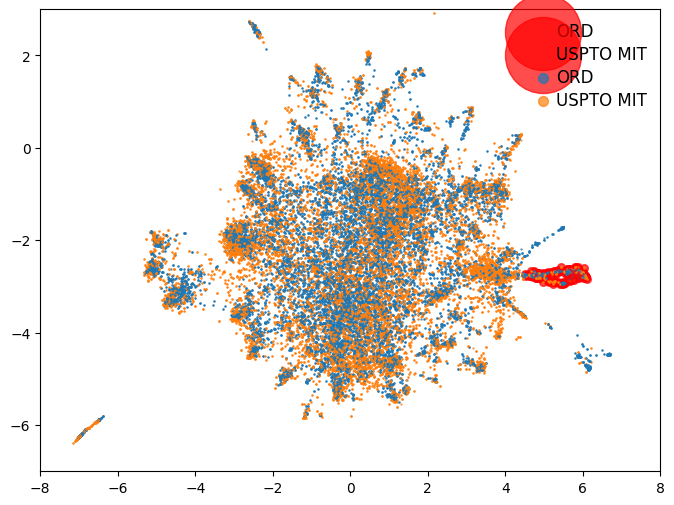

In [88]:
target_embedding_umap[:, 0] < -6
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
selected_target_embedding_umap = target_embedding_umap[(target_embedding_umap[:, 0] > 4.5) & (target_embedding_umap[:, 1] < -2.5) & (target_embedding_umap[:, 1] > -3.5)]
selected_df_target = df_target[(target_embedding_umap[:, 0] > 4.5) & (target_embedding_umap[:, 1] < -2.5) & (target_embedding_umap[:, 1] > -3.5)]
selected_query_embedding_umap = query_embedding_umap[(query_embedding_umap[:, 0] > 4.5) & (query_embedding_umap[:, 1] < -2.5) & (query_embedding_umap[:, 1] > -3.5)]
selected_df_query = df_query[(query_embedding_umap[:, 0] > 4.5) & (query_embedding_umap[:, 1] < -2.5) & (query_embedding_umap[:, 1] > -3.5)]
for i in range(0, 10000, 200):
    ax.scatter(selected_target_embedding_umap[i:i+500, 0], selected_target_embedding_umap[i:i+500, 1], alpha=0.7, s=30, label="ORD" if i == 0 else None, color="red")
    ax.scatter(selected_query_embedding_umap[i:i+500, 0], selected_query_embedding_umap[i:i+500, 1], alpha=0.7, s=30, label="USPTO MIT" if i == 0 else None, color="red")
for i in range(0, 10000, 200):
    ax.scatter(target_embedding_umap[i:i+500, 0], target_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="ORD" if i == 0 else None, color="#1f77b4")
    ax.scatter(query_embedding_umap[i:i+500, 0], query_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="USPTO MIT" if i == 0 else None, color="#ff7f0e")
ax.scatter(selected_target_embedding_umap[10, 0], selected_target_embedding_umap[10, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="x")
ax.scatter(selected_target_embedding_umap[30, 0], selected_target_embedding_umap[30, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="*")
ax.scatter(selected_target_embedding_umap[50, 0], selected_target_embedding_umap[50, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="o")
# ax.set_xlabel("UMAP 1")
# ax.set_ylabel("UMAP 2")
ax.set_xlim(-8, 8)
ax.set_ylim(-7, 3)
# ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
# ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)


10 REACTANT
['CC1(C)OB(c2ccc3[nH]ccc3c2)OC1(C)C', 'CSc1nnc(Br)s1', 'O=C([O-])[O-]']


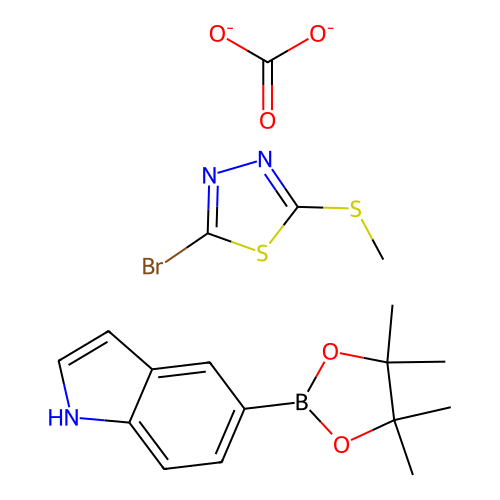

10 REAGENT
['C1COCCO1', 'CCOC(C)=O', 'c1ccc([P](c2ccccc2)(c2ccccc2)[Pd]([P](c2ccccc2)(c2ccccc2)c2ccccc2)([P](c2ccccc2)(c2ccccc2)c2ccccc2)[P](c2ccccc2)(c2ccccc2)c2ccccc2)cc1']


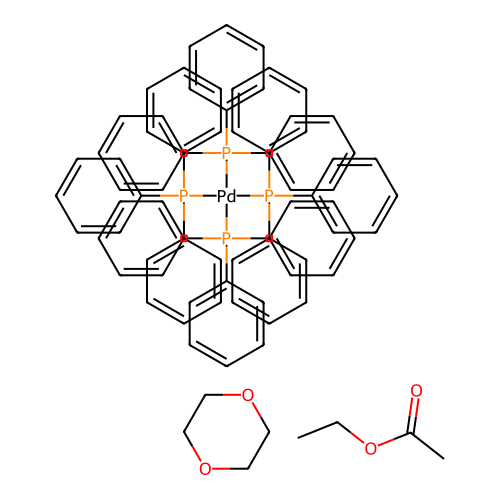

10 PRODUCT
['CSc1nnc(-c2ccc3[nH]ccc3c2)s1']


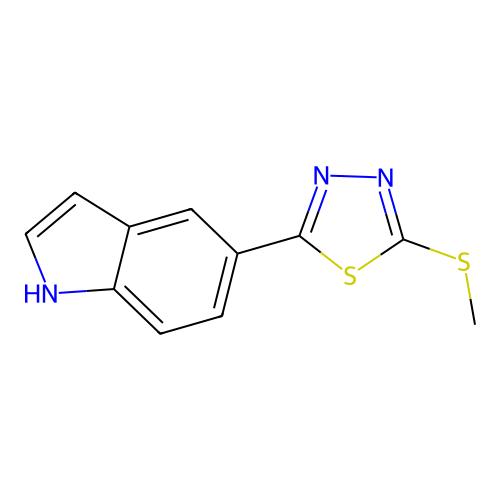

70 REACTANT
['COc1cc(OC)cc(B(O)O)c1', 'O=C([O-])[O-]', 'O=Cc1cc(Br)c(F)cc1[N+](=O)[O-]']


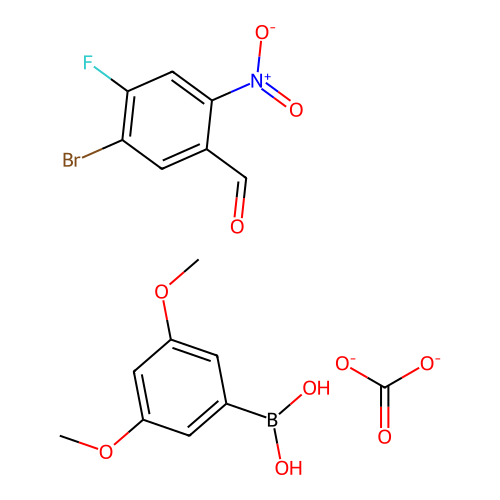

70 REAGENT
['C1COCCO1', 'Cl[Pd-]([PH](c1ccccc1)(c1ccccc1)c1ccccc1)[PH](c1ccccc1)(c1ccccc1)c1ccccc1']


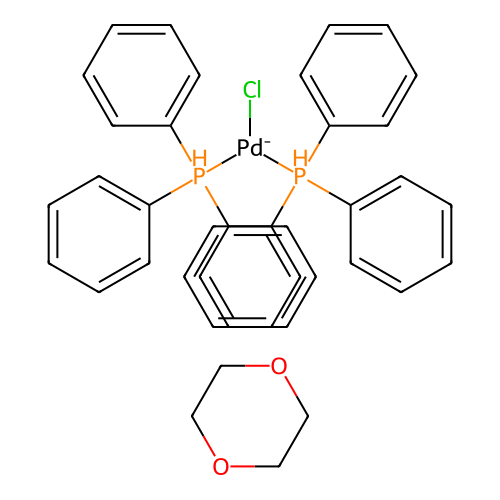

70 PRODUCT
['COc1cc(OC)cc(-c2cc(C=O)c([N+](=O)[O-])cc2F)c1']


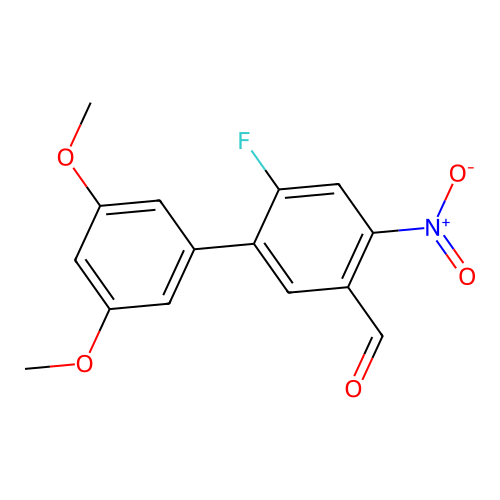

50 REACTANT
['C1COCCO1', 'CC#C[Sn](CCCC)(CCCC)CCCC', 'C[Si](C)(C)CCOCn1cnc(-c2sc(Br)nc2Br)n1']


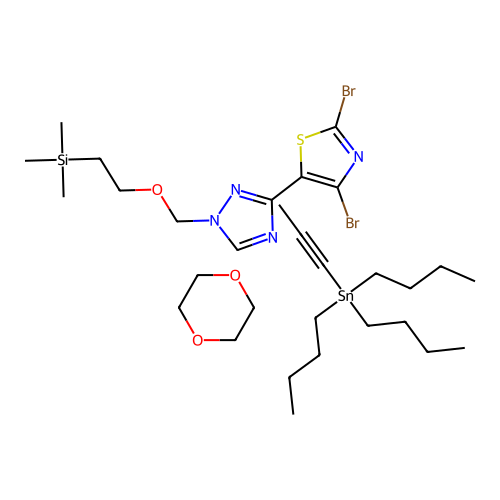

50 REAGENT
['ClCCl', '[Cu]I', 'c1ccc([P](c2ccccc2)(c2ccccc2)[Pt]([P](c2ccccc2)(c2ccccc2)c2ccccc2)([P](c2ccccc2)(c2ccccc2)c2ccccc2)[P](c2ccccc2)(c2ccccc2)c2ccccc2)cc1']


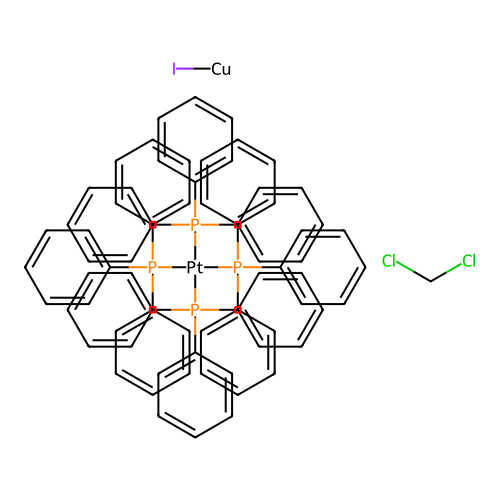

50 PRODUCT
['CC#Cc1nc(Br)c(-c2ncn(COCC[Si](C)(C)C)n2)s1']


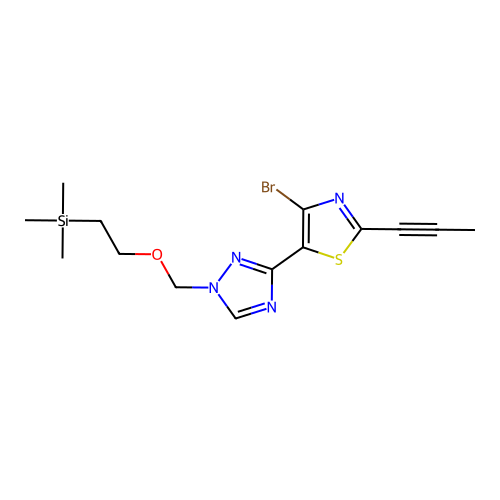

In [91]:
for idx in [10, 70, 50]:
    for col in ["REACTANT", "REAGENT", "PRODUCT"]:
        print(idx, col)
        # visualize the compounds with RDKit
        from rdkit import Chem
        from rdkit.Chem import Draw
        smiles = selected_df_target.iloc[idx][col]
        if smiles != " ":
            smiles = [i for i in smiles.split(".") if ("C" in i or "c" in i) and i != "Cl" and i != "[Cs+]" and i != "[Cl-]"]
            print(smiles)
            smiles = ".".join(smiles)
            mol = Chem.MolFromSmiles(smiles)
            img = Draw.MolToImage(mol, size=(500, 500), fitImage=True)
            display(img)
        else:
            print("No compound")
    

In [18]:
# calculate the molecular weight
from rdkit import Chem
from rdkit.Chem import Descriptors
# silence warning
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')
from transformers import AutoTokenizer 
tokenizer = AutoTokenizer.from_pretrained("sagawa/ReactionT5v2-forward")

for df in [df_target, df_query]:
    df["mol"] = df["input"].apply(Chem.MolFromSmiles)
    df["mw"] = df["mol"].apply(Descriptors.MolWt)
    df["logp"] = df["mol"].apply(Descriptors.MolLogP)
    df["hba"] = df["mol"].apply(Descriptors.NumHAcceptors)
    df["hbd"] = df["mol"].apply(Descriptors.NumHDonors)
    df["tpsa"] = df["mol"].apply(Descriptors.TPSA)
    df["rotb"] = df["mol"].apply(Descriptors.NumRotatableBonds)
    df["atoms"] = df["mol"].apply(Descriptors.HeavyAtomCount)
    df["rings"] = df["mol"].apply(Descriptors.RingCount)
    df["qed"] = df["mol"].apply(Descriptors.qed)
    df["input_len"] = df["input"].apply(lambda x: len(tokenizer(x)["input_ids"]))

/home/sagawa/miniconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


<Axes: >

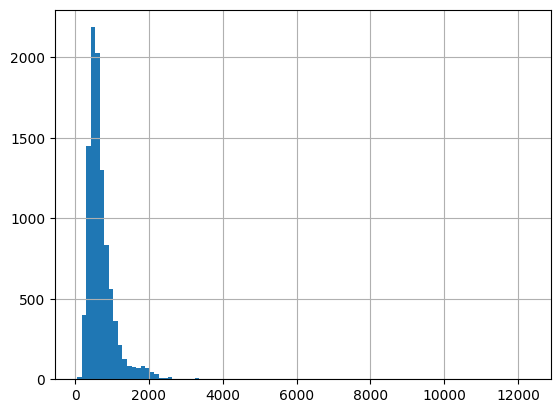

In [19]:
df_target["mw"].hist(bins=100)

In [ ]:
# for each feature, clip with 5% and 95% percentile
features = ["mw", "logp", "hba", "hbd", "tpsa", "rotb", "atoms", "rings", "qed", "input_len"]
for feature in features:
    lower = df_target[feature].quantile(0.05)
    upper = df_target[feature].quantile(0.95)
    df_target[feature] = df_target[feature].clip(lower, upper)
    lower = df_query[feature].quantile(0.05)
    upper = df_query[feature].quantile(0.95)
    df_query[feature] = df_query[feature].clip(lower, upper)

/tmp/ipykernel_1873210/3492026362.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1873210/3492026362.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


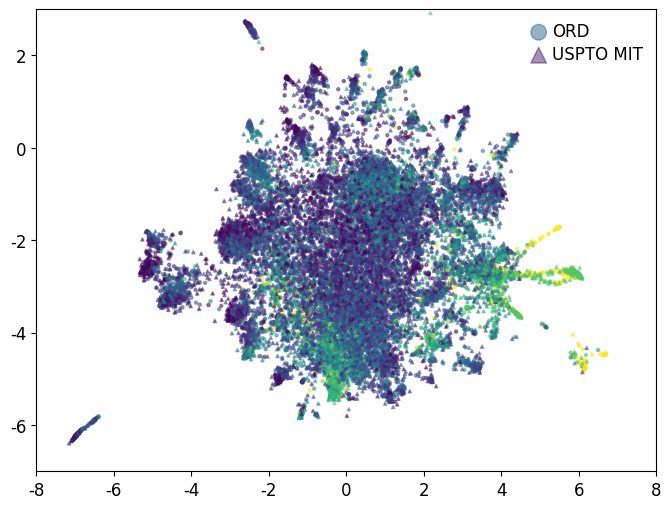

In [22]:
# color by molecular weight
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["mw"].min(), df_query["mw"].min()), max(df_target["mw"].max(), df_query["mw"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["mw"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO MIT", c=cmap(norm(df_query["mw"])), marker="^")
# plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Molecular Weight")
ax.set_xlim(-8, 8)
ax.set_ylim(-7, 3)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)
plt.show()

/tmp/ipykernel_1873210/1509969226.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1873210/1509969226.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


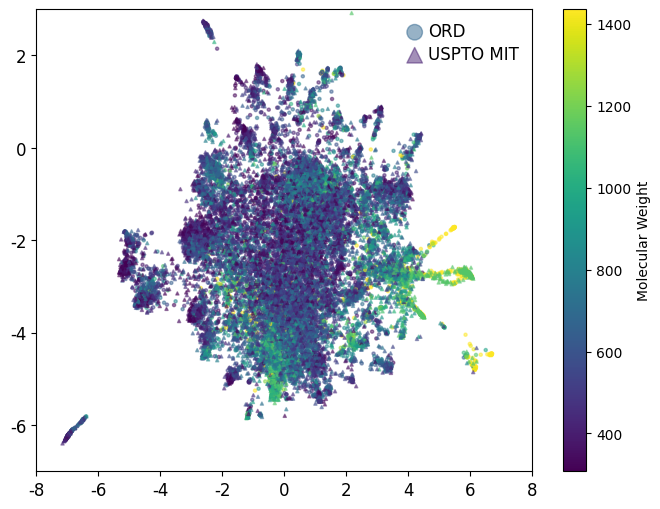

In [23]:
# color by molecular weight
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["mw"].min(), df_query["mw"].min()), max(df_target["mw"].max(), df_query["mw"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["mw"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO MIT", c=cmap(norm(df_query["mw"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Molecular Weight")
ax.set_xlim(-8, 8)
ax.set_ylim(-7, 3)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)
plt.show()

/tmp/ipykernel_1873210/480589535.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1873210/480589535.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


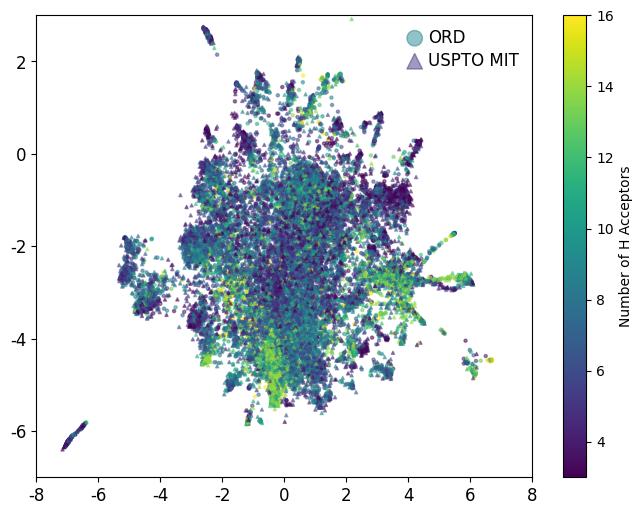

In [24]:

cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["hba"].min(), df_query["hba"].min()), max(df_target["hba"].max(), df_query["hba"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["hba"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO MIT", c=cmap(norm(df_query["hba"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Number of H Acceptors")
ax.set_xlim(-8, 8)
ax.set_ylim(-7, 3)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)
plt.show()

/tmp/ipykernel_1873210/2948452720.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1873210/2948452720.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


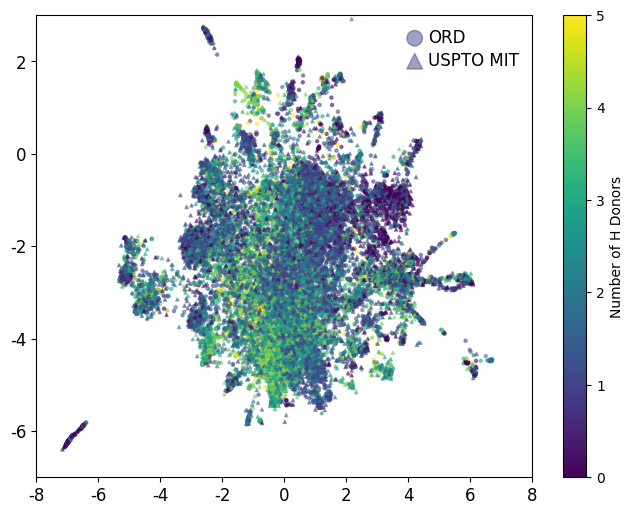

In [25]:

cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["hbd"].min(), df_query["hbd"].min()), max(df_target["hbd"].max(), df_query["hbd"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["hbd"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO MIT", c=cmap(norm(df_query["hbd"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Number of H Donors")
ax.set_xlim(-8, 8)
ax.set_ylim(-7, 3)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)
plt.show()

/tmp/ipykernel_1873210/795822544.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1873210/795822544.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


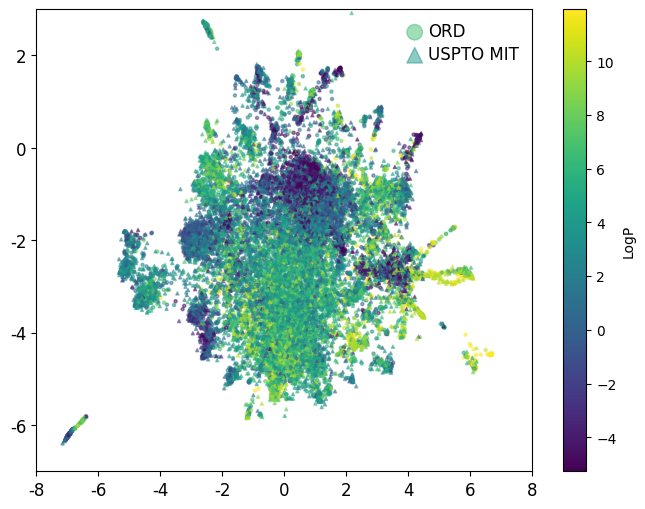

In [26]:

cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["logp"].min(), df_query["logp"].min()), max(df_target["logp"].max(), df_query["logp"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["logp"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO MIT", c=cmap(norm(df_query["logp"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="LogP")
ax.set_xlim(-8, 8)
ax.set_ylim(-7, 3)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)
plt.show()

/tmp/ipykernel_1873210/3909437064.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1873210/3909437064.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


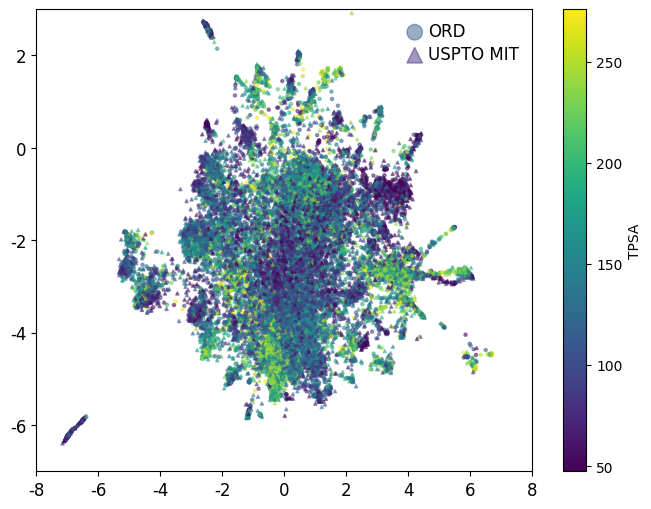

In [27]:

cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["tpsa"].min(), df_query["tpsa"].min()), max(df_target["tpsa"].max(), df_query["tpsa"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["tpsa"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO MIT", c=cmap(norm(df_query["tpsa"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="TPSA")
ax.set_xlim(-8, 8)
ax.set_ylim(-7, 3)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)
plt.show()

/tmp/ipykernel_1873210/3120380207.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1873210/3120380207.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


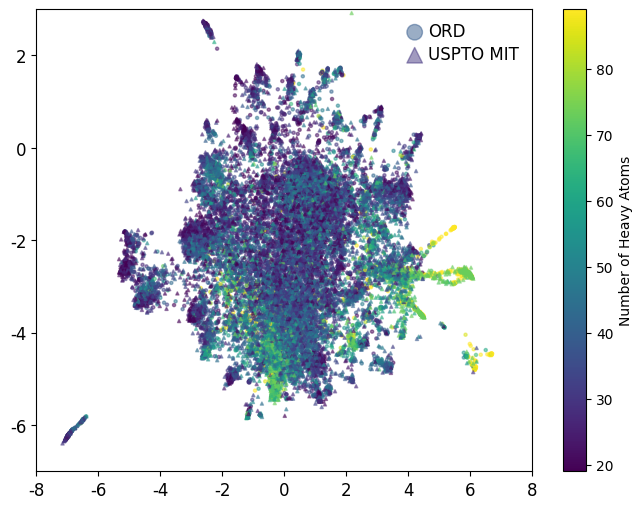

In [28]:

cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["atoms"].min(), df_query["atoms"].min()), max(df_target["atoms"].max(), df_query["atoms"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["atoms"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO MIT", c=cmap(norm(df_query["atoms"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Number of Heavy Atoms")
ax.set_xlim(-8, 8)
ax.set_ylim(-7, 3)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)
plt.show()

/tmp/ipykernel_1873210/855440832.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1873210/855440832.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


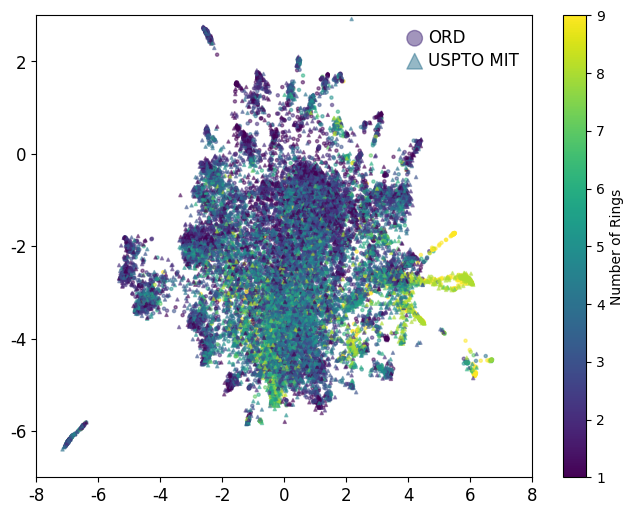

In [29]:

cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["rings"].min(), df_query["rings"].min()), max(df_target["rings"].max(), df_query["rings"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["rings"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO MIT", c=cmap(norm(df_query["rings"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Number of Rings")
ax.set_xlim(-8, 8)
ax.set_ylim(-7, 3)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)
plt.show()

/tmp/ipykernel_1873210/2522850090.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1873210/2522850090.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


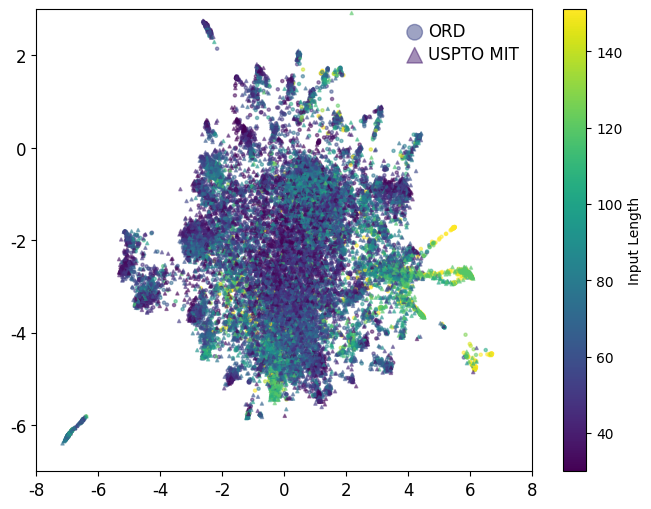

In [30]:

cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["input_len"].min(), df_query["input_len"].min()), max(df_target["input_len"].max(), df_query["input_len"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["input_len"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO MIT", c=cmap(norm(df_query["input_len"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Input Length")
ax.set_xlim(-8, 8)
ax.set_ylim(-7, 3)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)
plt.show()

# visualize distance

In [3]:
distance = pd.read_csv("/data1/ReactionT5_neword/task_forward/output_uspto_test/distance.csv")
distance

Unnamed: 0                                           REACTANT  \
0               0            N#Cc1ccsc1N.O=[N+]([O-])c1cc(F)c(F)cc1F   
1               1  COC(=O)Cc1cn(C)c2cc(O)ccc12.Cc1nn(-c2ccc(C(F)(...   
2               2  Cl.NC1CCN(CC2Cn3c(=O)ccc4ncc(F)c2c43)CC1O.O=Cc...   
3               3  C=C(C)C(=O)Cl.CC(C)=C1C(=O)N(c2ccc(O)cc2)C(=O)...   
4               4                          O=Cc1cncc(Cl)c1COC1CCCCO1   
...           ...                                                ...   
39995       39995                  COC(=O)NCC1Cc2c(Cl)cc3c(c2O1)CCC3   
39996       39996                   COc1cccc(C(=O)Cl)c1.COc1ccccc1OC   
39997       39997  C#Cc1cccc(C2C(C(=O)OC)=C(C)NC(C(OC)OC)=C2C(=O)...   
39998       39998                  CO.COc1ccc(CC(=O)c2ccc(O)cc2O)cc1   
39999       39999                             CC(=O)O.OCc1cccc(Cl)c1   

                                                 REAGENT  \
0                                     C1CCOC1.[H-].[Na+]   
1                              CCCCP(CCCC)CCCC.Cc1ccccc1   
2                                     CCOCC.Cl.ClC(Cl)Cl   
3                                        CCN(CC)CC.ClCCl   
4                                       OCc1c(Cl)cncc1Cl   
...                                                  ...   
39995                   [Al+3].[H-].[H-].[H-].[H-].[Li+]   
39996  COc1ccc(C(=CC#N)c2ccc(OC)c(OC)c2)cc1.ClCCl.[Al...   
39997                                         CC(C)=O.Cl   
39998                                                      
39999                              Cc1ccc(S(=O)(=O)O)cc1   

                                                 PRODUCT  \
0                  N#Cc1ccsc1Nc1cc(F)c(F)cc1[N+](=O)[O-]   
1      COC(=O)Cc1cn(C)c2cc(OCC(C)c3cn(-c4ccc(C(F)(F)F...   
2      O=c1ccc2ncc(F)c3c2n1CC3CN1CCC(NCc2cc3c(cn2)OCS...   
3      C=C(C)C(=O)Oc1ccc(N2C(=O)C(=C(C)C)C(=C(C)c3cc(...   
4                               OCc1cncc(Cl)c1COC1CCCCO1   
...                                                  ...   
39995                        CNCC1Cc2c(Cl)cc3c(c2O1)CCC3   
39996                  COc1cccc(C(=O)c2ccc(OC)c(OC)c2)c1   
39997    C#Cc1cccc(C2C(C(=O)OC)=C(C)NC(C=O)=C2C(=O)OC)c1   
39998                    COc1ccc(CC(=O)c2ccc(OC)cc2O)cc1   
39999                               CC(=O)OCc1cccc(Cl)c1   

                                                   input CATALYST SOLVENT  \
0      REACTANT:N#Cc1ccsc1N.O=[N+]([O-])c1cc(F)c(F)cc...                    
1      REACTANT:COC(=O)Cc1cn(C)c2cc(O)ccc12.Cc1nn(-c2...                    
2      REACTANT:Cl.NC1CCN(CC2Cn3c(=O)ccc4ncc(F)c2c43)...                    
3      REACTANT:C=C(C)C(=O)Cl.CC(C)=C1C(=O)N(c2ccc(O)...                    
4      REACTANT:O=Cc1cncc(Cl)c1COC1CCCCO1REAGENT:OCc1...                    
...                                                  ...      ...     ...   
39995  REACTANT:COC(=O)NCC1Cc2c(Cl)cc3c(c2O1)CCC3REAG...                    
39996  REACTANT:COc1cccc(C(=O)Cl)c1.COc1ccccc1OCREAGE...                    
39997  REACTANT:C#Cc1cccc(C2C(C(=O)OC)=C(C)NC(C(OC)OC...                    
39998  REACTANT:CO.COc1ccc(CC(=O)c2ccc(O)cc2O)cc1REAG...                    
39999  REACTANT:CC(=O)O.OCc1cccc(Cl)c1REAGENT:Cc1ccc(...                    

       distance  
0      0.933787  
1      0.902206  
2      0.883629  
3      0.974624  
4      0.637379  
...         ...  
39995  0.975840  
39996  0.869934  
39997  0.877674  
39998  0.889612  
39999  0.776299  

[40000 rows x 8 columns]

/tmp/ipykernel_3476578/97392767.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


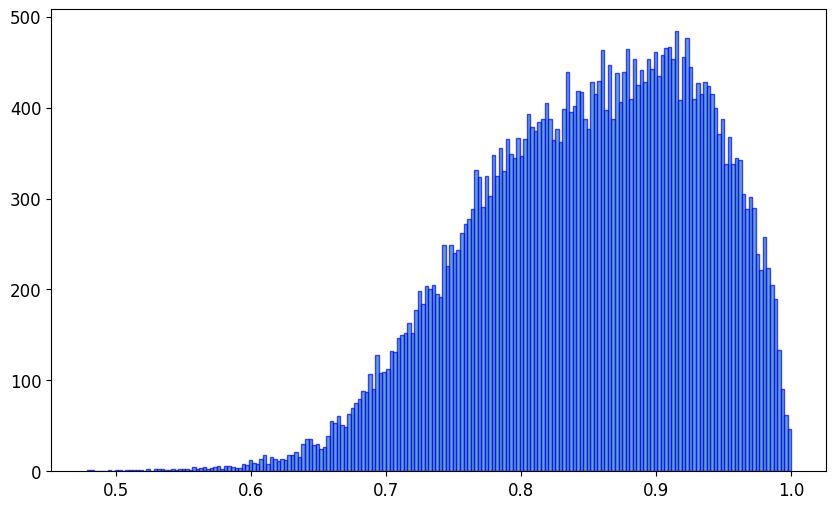

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
distance["distance"].hist(bins=200, ax=ax, edgecolor="b", alpha=0.7)
ax.set_xticks(np.arange(0.5, 1.05, 0.1))
ax.set_xticklabels([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.grid(axis="y", alpha=0)
ax.grid(axis="x", alpha=0)

In [3]:
# target_embedding = np.load("/mnt/d/ReactionT5_neword_241116/task_forward/output_ord/embedding_mean_v5.npy")
# umap = UMAP(n_components=2)
# target_embedding_umap = umap.fit_transform(target_embedding)

# save_pickle("/mnt/d/ReactionT5_neword_241116/task_forward/output_ord/umap_full_v5.pkl", umap)
# np.save("/mnt/d/ReactionT5_neword_241116/task_forward/output_ord/embedding_umap_full_v5.npy", target_embedding_umap)
# query_embedding = np.load("/mnt/d/ReactionT5_neword_241116/task_forward/output_uspto_test/embedding_mean_v5.npy")
# query_embedding_umap = umap.transform(query_embedding)
# np.save("/mnt/d/ReactionT5_neword_241116/task_forward/output_uspto_test/query_embedding_umap_full_v5.npy", query_embedding_umap)

# morgan fingerprint

In [34]:
df_target = pd.read_csv("/mnt/d/ReactionT5_neword_241116/task_forward/output_ord/input_data_v5.csv")
df_query = pd.read_csv("/mnt/d/ReactionT5_neword_241116/task_forward/output_uspto_test/input_data_v5.csv")

df_target["input"] = df_target["input"].apply(lambda x: x.replace("REACTANT:", "").replace("REAGENT:", ".").replace(". ", ""))
df_query["input"] = df_query["input"].apply(lambda x: x.replace("REACTANT:", "").replace("REAGENT:", ".").replace(". ", ""))

from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
# silence warning
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')

# target_fp = []
# query_fp = []
# for smiles in df_target["input"]:
#     mol = Chem.MolFromSmiles(smiles)
#     fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024)
#     target_fp.append(fp)
# for smiles in df_query["input"]:
#     mol = Chem.MolFromSmiles(smiles)
#     fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024)
#     query_fp.append(fp)

In [ ]:
# from rdkit import DataStructs
# similarity_score = [0 for _ in range(len(query_fp))]
# for i, query in enumerate(query_fp):
#     scores = []
#     for j, target in enumerate(target_fp):
#         scores.append(DataStructs.TanimotoSimilarity(query, target))
#     # store the index of the most similar target
#     similarity_score[i] = np.argmax(scores)

# similarity_score = np.array(similarity_score)
# np.save("/data1/ReactionT5_neword/task_forward/output_uspto_test/similar_reactions_index_morgan_tanimoto_v5_radius3.npy", similarity_score)

Mean: 2.898125 Std: 8.098743512692261 Max: 102 Min: 0 Median: 0.0 25%: 0.0 75%: 0.0


/tmp/ipykernel_2179262/2557829848.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=16)
/tmp/ipykernel_2179262/2557829848.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=16)


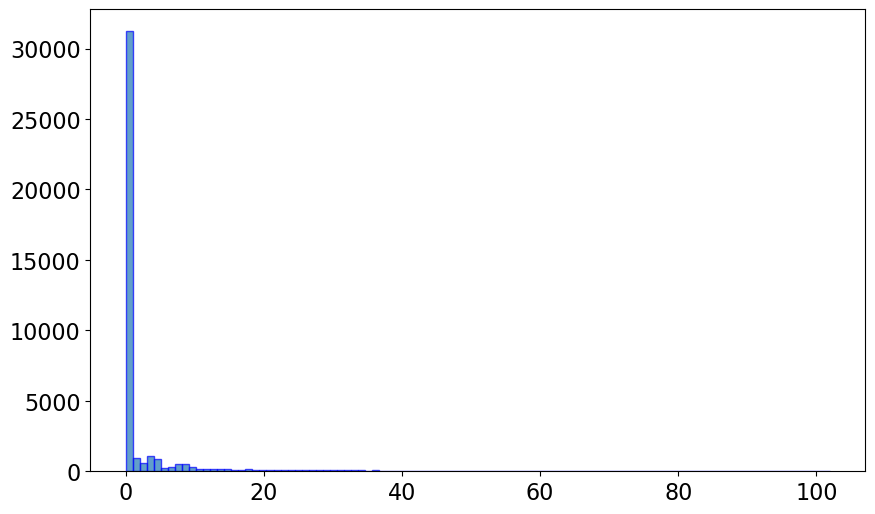

In [35]:
import Levenshtein
similar_reactions = np.load("/mnt/d/ReactionT5_neword_241116/task_forward/output_uspto_test/similar_reactions_index_morgan_tanimoto_v5_radius3.npy")
df_similar = df_target.iloc[similar_reactions].reset_index(drop=True)
distances = []
for i in range(len(df_query)):
    distances.append(Levenshtein.distance(df_query["PRODUCT"][i], df_similar["PRODUCT"][i]))
distances = np.array(distances)
# print statistics
print("Mean:", distances.mean(), "Std:", distances.std(), "Max:", distances.max(), "Min:", distances.min(), "Median:", np.median(distances), "25%:", np.percentile(distances, 25), "75%:", np.percentile(distances, 75))
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(distances, bins=100 ,edgecolor="b", alpha=0.7)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=16)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=16)
ax.grid(axis="y", alpha=0)
ax.grid(axis="x", alpha=0)

# ReactionT5

Processing batch 0...
Processing batch 1...
Processing batch 2...
Processing batch 3...
Processing batch 4...
Processing batch 5...
Processing batch 6...
Processing batch 7...
Processing batch 8...
Processing batch 9...
Processing batch 10...
Processing batch 11...
Processing batch 12...
Processing batch 13...
Processing batch 14...
Processing batch 15...
Processing batch 16...
Processing batch 17...
Processing batch 18...
Processing batch 19...
Processing batch 20...
Processing batch 21...
Processing batch 22...
Processing batch 23...
Processing batch 24...
Processing batch 25...
Processing batch 26...
Processing batch 27...
Processing batch 28...
Processing batch 29...
Processing batch 30...
Processing batch 31...
Processing batch 32...
Processing batch 33...
Processing batch 34...
Processing batch 35...
Processing batch 36...
Processing batch 37...
Processing batch 38...
Processing batch 39...
40000 40000
Mean: 2.763175 Std: 7.600838040596248 Max: 102 Min: 0 Median: 0.0 25%: 0.0 75%

/tmp/ipykernel_2179262/2507315878.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=16)
/tmp/ipykernel_2179262/2507315878.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=16)


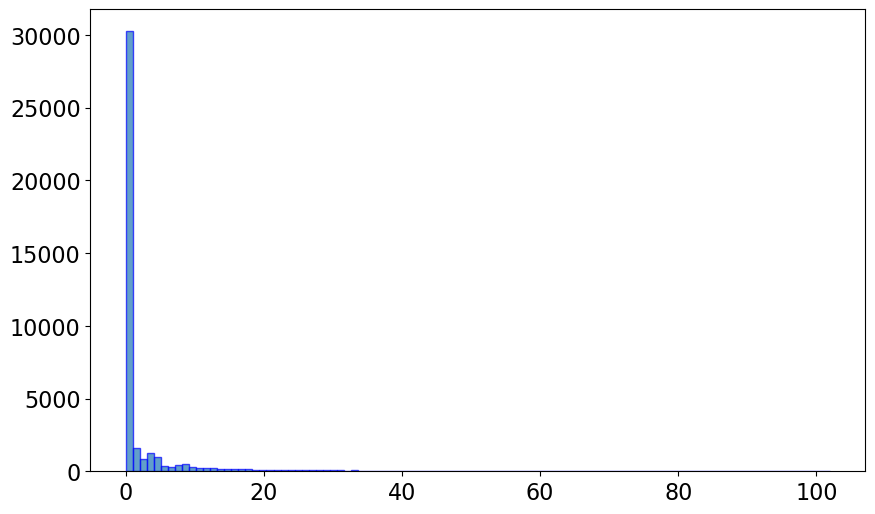

In [36]:
df_target = pd.read_csv("/mnt/d/ReactionT5_neword_241116/task_forward/output_ord/input_data_v5.csv")
df_query = pd.read_csv("/mnt/d/ReactionT5_neword_241116/task_forward/output_uspto_test/input_data_v5.csv")
target_embedding = np.load("/mnt/d/ReactionT5_neword_241116/task_forward/output_ord/embedding_mean_v5.npy")
query_embedding = np.load("/mnt/d/ReactionT5_neword_241116/task_forward/output_uspto_test/embedding_mean_v5.npy")
import torch
import os
import Levenshtein
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
target_embedding = torch.tensor(target_embedding, dtype=torch.float32).cuda()
query_embedding = torch.tensor(query_embedding, dtype=torch.float32).cuda()

embedding = torch.nn.functional.normalize(target_embedding, p=2, dim=1)
query_embedding = torch.nn.functional.normalize(query_embedding, p=2, dim=1)

batch_size = 1000
nearest_samples = []
similarities = []

for i in range(0, query_embedding.shape[0], batch_size):
    print(f"Processing batch {i//batch_size}...")
    batch = query_embedding[i: i + batch_size]
    similarity = torch.matmul(batch, embedding.T)
    similarity, nearest_sample = torch.topk(similarity, k=1, dim=1)
    nearest_samples.append(nearest_sample.cpu().tolist())
    similarities.append(similarity.cpu().tolist())
nearest_samples = np.concatenate(nearest_samples).flatten()
similarities = np.concatenate(similarities).flatten()

df_similar = df_target.iloc[nearest_samples].reset_index(drop=True)
print(len(df_similar), len(df_query))
distances = []
for i in range(len(df_query)):
    distances.append(Levenshtein.distance(df_query["PRODUCT"][i], df_similar["PRODUCT"][i]))
distances = np.array(distances)
print("Mean:", distances.mean(), "Std:", distances.std(), "Max:", distances.max(), "Min:", distances.min(), "Median:", np.median(distances), "25%:", np.percentile(distances, 25), "75%:", np.percentile(distances, 75))
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(distances, bins=100 ,edgecolor="b", alpha=0.7)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=16)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=16)
ax.grid(axis="y", alpha=0)
ax.grid(axis="x", alpha=0)

# T5Chem

In [37]:
df_target = pd.read_csv("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/forward/input_data_v5_forward_ord.csv")
df_query = pd.read_csv("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/forward/input_data_v5_forward_uspto_test.csv")
target_embedding = np.load("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/forward/ord/embedding.npy")
query_embedding = np.load("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/forward/uspto_test/embedding.npy")

In [39]:
print(target_embedding.shape, query_embedding.shape, len(df_target), len(df_query))

torch.Size([1787900, 512]) torch.Size([40000, 512]) 1787900 40000


(1787900, 11) (40000, 7)
Processing batch 0...
Processing batch 1...
Processing batch 2...
Processing batch 3...
Processing batch 4...
Processing batch 5...
Processing batch 6...
Processing batch 7...
Processing batch 8...
Processing batch 9...
Processing batch 10...
Processing batch 11...
Processing batch 12...
Processing batch 13...
Processing batch 14...
Processing batch 15...
Processing batch 16...
Processing batch 17...
Processing batch 18...
Processing batch 19...
Processing batch 20...
Processing batch 21...
Processing batch 22...
Processing batch 23...
Processing batch 24...
Processing batch 25...
Processing batch 26...
Processing batch 27...
Processing batch 28...
Processing batch 29...
Processing batch 30...
Processing batch 31...
Processing batch 32...
Processing batch 33...
Processing batch 34...
Processing batch 35...
Processing batch 36...
Processing batch 37...
Processing batch 38...
Processing batch 39...
40000 40000
Mean: 25.553025 Std: 15.992540084344794 Max: 194 Min:

/tmp/ipykernel_2179262/3819680964.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=16)
/tmp/ipykernel_2179262/3819680964.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=16)


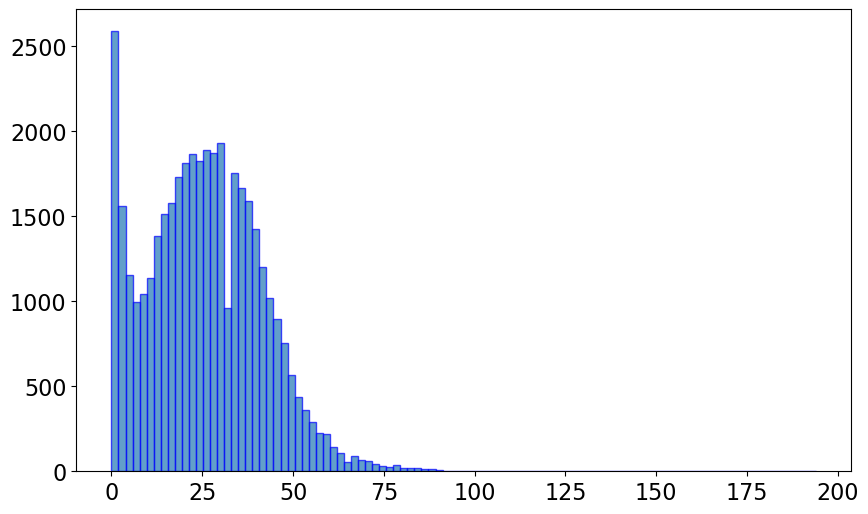

In [38]:
print(df_target.shape, df_query.shape)

import torch
import os
import Levenshtein
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
target_embedding = torch.tensor(target_embedding, dtype=torch.float32).cuda()
query_embedding = torch.tensor(query_embedding, dtype=torch.float32).cuda()

embedding = torch.nn.functional.normalize(target_embedding, p=2, dim=1)
query_embedding = torch.nn.functional.normalize(query_embedding, p=2, dim=1)

batch_size = 1000
nearest_samples = []
similarities = []

for i in range(0, query_embedding.shape[0], batch_size):
    print(f"Processing batch {i//batch_size}...")
    batch = query_embedding[i: i + batch_size]
    similarity = torch.matmul(batch, embedding.T)
    similarity, nearest_sample = torch.topk(similarity, k=1, dim=1)
    nearest_samples.append(nearest_sample.cpu().tolist())
    similarities.append(similarity.cpu().tolist())
nearest_samples = np.concatenate(nearest_samples).flatten()
similarities = np.concatenate(similarities).flatten()

df_similar = df_target.iloc[nearest_samples].reset_index(drop=True)
print(len(df_similar), len(df_query))
distances = []
for i in range(len(df_query)):
    distances.append(Levenshtein.distance(df_query["PRODUCT"][i], df_similar["PRODUCT"][i]))
distances = np.array(distances)
print("Mean:", distances.mean(), "Std:", distances.std(), "Max:", distances.max(), "Min:", distances.min(), "Median:", np.median(distances), "25%:", np.percentile(distances, 25), "75%:", np.percentile(distances, 75))
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(distances, bins=100 ,edgecolor="b", alpha=0.7)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=16)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=16)
ax.grid(axis="y", alpha=0)
ax.grid(axis="x", alpha=0)

In [ ]:
# # apply UMAP and plot
# umap = UMAP(n_components=2)
# # sample 10000 points
sample_idx_target = np.random.choice(target_embedding.shape[0], 10000, replace=False)
sample_idx_query = np.random.choice(query_embedding.shape[0], 10000, replace=False)
target_embedding_sampling = target_embedding[sample_idx_target]
query_embedding_sampling = query_embedding[sample_idx_query]
# target_embedding_umap = umap.fit_transform(target_embedding_sampling)

# save_pickle("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/forward/umap_v5.pkl", umap)
# np.save("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/forward/ord/embedding_umap_v5.npy", target_embedding_umap)
umap = load_pickle("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/forward/umap_v5.pkl")

query_embedding_umap = umap.transform(query_embedding_sampling)
np.save("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/forward/uspto_test/query_embedding_umap_v5.npy", query_embedding_umap)

target_embedding_umap = np.load("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/forward/ord/embedding_umap_v5.npy")
query_embedding_umap = np.load("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/forward/uspto_test/query_embedding_umap_v5.npy")

In [27]:
# calculate the molecular weight
from rdkit import Chem
from rdkit.Chem import Descriptors
# silence warning
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')
from transformers import AutoTokenizer 

# sample_idx_target = np.random.choice(target_embedding.shape[0], 10000, replace=False)
# target_embedding = target_embedding[sample_idx_target]

# df_target = pd.read_csv("/mnt/d/ReactionT5_neword_241116/task_forward/output_ord/input_data_v5.csv")
# df_target = df_target.iloc[sample_idx_target].reset_index(drop=True)
# df_query = pd.read_csv("/mnt/d/ReactionT5_neword_241116/task_forward/output_uspto_test/input_data_v5.csv")
# df_query = df_query.iloc[sample_idx_query].reset_index(drop=True)

df_target = df_target.iloc[sample_idx_target].reset_index(drop=True)
df_query = df_query.iloc[sample_idx_query].reset_index(drop=True)

df_target["input"] = df_target["input"].apply(lambda x: x.replace("REACTANT:", "").replace("REAGENT:", ".").replace(". ", ""))
df_query["input"] = df_query["input"].apply(lambda x: x.replace("REACTANT:", "").replace("REAGENT:", ".").replace(". ", ""))

for df in [df_target, df_query]:
    df["mol"] = df["input"].apply(Chem.MolFromSmiles)
    df["mw"] = df["mol"].apply(Descriptors.MolWt)

In [28]:
# for each feature, clip with 5% and 95% percentile
features = ["mw"]
for feature in features:
    lower = df_target[feature].quantile(0.05)
    upper = df_target[feature].quantile(0.95)
    df_target[feature] = df_target[feature].clip(lower, upper)
    lower = df_query[feature].quantile(0.05)
    upper = df_query[feature].quantile(0.95)
    df_query[feature] = df_query[feature].clip(lower, upper)

/tmp/ipykernel_2179262/3775074512.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_2179262/3775074512.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


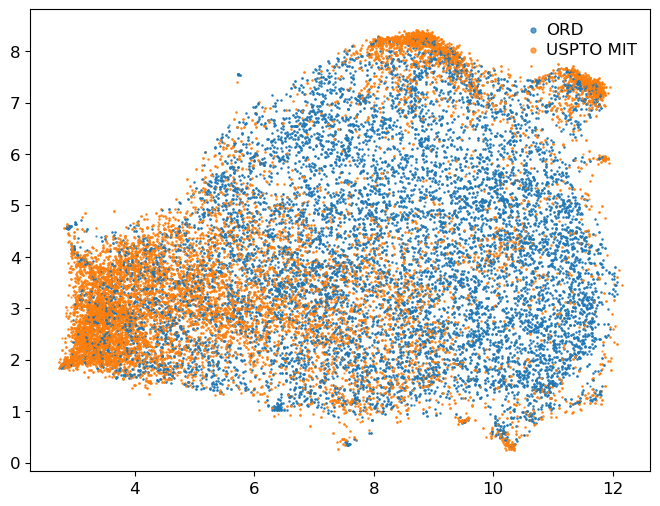

In [ ]:
# color by molecular weight
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
for i in range(0, 10000, 200):
    ax.scatter(target_embedding_umap[i:i+500, 0], target_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="ORD" if i == 0 else None, color="#1f77b4")
    ax.scatter(query_embedding_umap[i:i+500, 0], query_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="USPTO MIT" if i == 0 else None, color="#ff7f0e")
# plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Molecular Weight")
# ax.set_xlim(-8, 8)
# ax.set_ylim(-7, 3)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)
plt.show()

/tmp/ipykernel_2179262/2727480388.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_2179262/2727480388.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


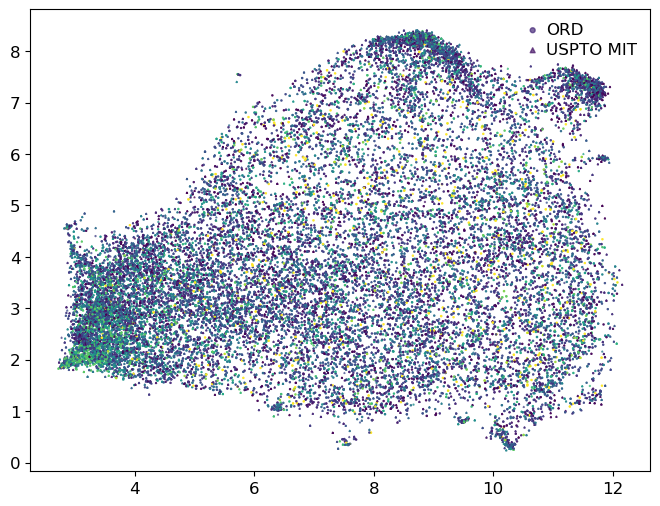

In [32]:
# color by molecular weight
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["mw"].min(), df_query["mw"].min()), max(df_target["mw"].max(), df_query["mw"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
for i in range(0, 10000, 200):
    # ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["mw"])), marker="o")
    # ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO MIT", c=cmap(norm(df_query["mw"])), marker="^")
    ax.scatter(target_embedding_umap[i:i+500, 0], target_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="ORD" if i == 0 else None, c=cmap(norm(df_target["mw"][i:i+500])), marker="o")
    ax.scatter(query_embedding_umap[i:i+500, 0], query_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="USPTO MIT" if i == 0 else None, c=cmap(norm(df_query["mw"][i:i+500])), marker="^")
# plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Molecular Weight")
# ax.set_xlim(-8, 8)
# ax.set_ylim(-7, 3)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)
plt.show()

/tmp/ipykernel_2179262/2057547585.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_2179262/2057547585.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


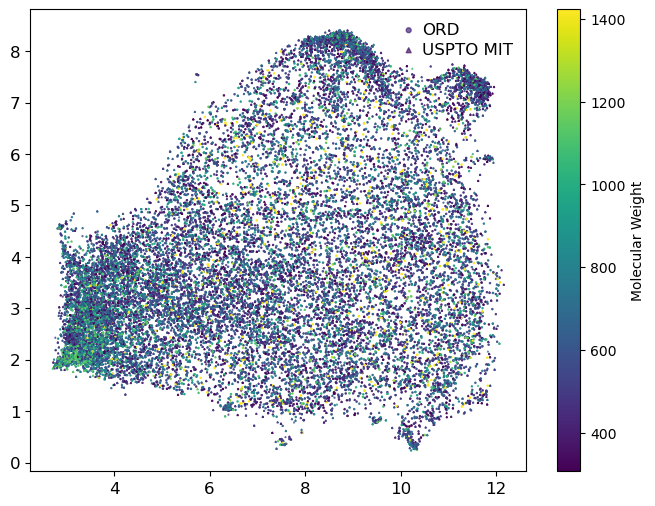

In [33]:
# color by molecular weight
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["mw"].min(), df_query["mw"].min()), max(df_target["mw"].max(), df_query["mw"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
for i in range(0, 10000, 200):
    # ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["mw"])), marker="o")
    # ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO MIT", c=cmap(norm(df_query["mw"])), marker="^")
    ax.scatter(target_embedding_umap[i:i+500, 0], target_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="ORD" if i == 0 else None, c=cmap(norm(df_target["mw"][i:i+500])), marker="o")
    ax.scatter(query_embedding_umap[i:i+500, 0], query_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="USPTO MIT" if i == 0 else None, c=cmap(norm(df_query["mw"][i:i+500])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Molecular Weight")
# ax.set_xlim(-8, 8)
# ax.set_ylim(-7, 3)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)
plt.show()